In [2]:
import pandas as pd
df = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [3]:
print(df.head()) 

categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask].tolist()

df[categorical_cols] 


       id  inning  over  ball      batsman  non_striker     bowler  \
0  335982       1     6     5   RT Ponting  BB McCullum  AA Noffke   
1  335982       1     6     6  BB McCullum   RT Ponting  AA Noffke   
2  335982       1     7     1  BB McCullum   RT Ponting     Z Khan   
3  335982       1     7     2  BB McCullum   RT Ponting     Z Khan   
4  335982       1     7     3   RT Ponting  BB McCullum     Z Khan   

   batsman_runs  extra_runs  total_runs  non_boundary  is_wicket  \
0             1           0           1             0          0   
1             1           0           1             0          0   
2             0           0           0             0          0   
3             1           0           1             0          0   
4             1           0           1             0          0   

  dismissal_kind player_dismissed fielder extras_type           batting_team  \
0            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
1         

,batsman,non_striker,bowler,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,RT Ponting,BB McCullum,AA Noffke,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,BB McCullum,RT Ponting,AA Noffke,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,BB McCullum,RT Ponting,Z Khan,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,BB McCullum,RT Ponting,Z Khan,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,RT Ponting,BB McCullum,Z Khan,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...
193463,RR Pant,SS Iyer,NM Coulter-Nile,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,RR Pant,SS Iyer,NM Coulter-Nile,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,RR Pant,SS Iyer,KH Pandya,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,RR Pant,SS Iyer,KH Pandya,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [4]:
df.count()

id                  193468
inning              193468
over                193468
ball                193468
batsman             193468
non_striker         193468
bowler              193468
batsman_runs        193468
extra_runs          193468
total_runs          193468
non_boundary        193468
is_wicket           193468
dismissal_kind        9495
player_dismissed      9495
fielder               6784
extras_type          10233
batting_team        193468
bowling_team        193277
dtype: int64

In [5]:
df = df.drop(columns=['dismissal_kind', 'player_dismissed', 'fielder', 'extras_type'],axis=1)
df = df.dropna(how='any')
df.shape
df.head()


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore


In [6]:
df.count()

id              193277
inning          193277
over            193277
ball            193277
batsman         193277
non_striker     193277
bowler          193277
batsman_runs    193277
extra_runs      193277
total_runs      193277
non_boundary    193277
is_wicket       193277
batting_team    193277
bowling_team    193277
dtype: int64

2.3) Ahora hay que transformar los datos categóricos. Si recordáis, existen dos técnicas principales, one-hot encoding y label encoding. Label encoding solo es válido para variables que denotan notas o valoraciones, one-hot encoding para todos los casos.

Para homogeneizar los resultados, vamos a utilizar label encoding con *cut* y one-hot encoding con *color* y *clarity*.

A continuación, completa las líneas comentadas con TODO con tu propio código:

In [7]:
from sklearn import preprocessing
import numpy as np

# Cargamos el label encoder
label_encoder = preprocessing.LabelEncoder()

# Lo aplicamos sobre la la columna 'cut' -> le.fit_transform()
#TODO
df['ball']= label_encoder.fit_transform(df['ball']) 

# Ahora vamos a transformar la variable 'color'
df['over']= label_encoder.fit_transform(df['over']) 

# Cargamos el one-hot encoder
hot_encoder=preprocessing.OneHotEncoder(sparse=False)

# ¿Qué significa el atributo sparse? Proporciona la respuesta por medio de un comentario
# TODO Hacer una matriz dispersa. Clasificar las temáticas de los datos que se reunen.
# Para hacer una mmatriz dispersa. Se puede poner en true o no.

# Para simplificar el proceso, vamos a realizar las operaciones en un nuevo DataFrame formado por los datos a modificar
# Aplicamos el encoder la columna 'color' -> hot_encoder.fit_transform()
#TODO
datos_color = hot_encoder.fit_transform(df[['over']]) 

# Para obtener un nuevo DataFrame ->  pd.DataFrame (resultado_anterior)
#TODO color_data = 
color_data = pd.DataFrame(datos_color)

# Para que los nombres de las nuevas columnas tengan sentido, utilizaremos al siguiente función
#TODO color_data.columns = hot_encoder.get_feature_names(['NOMBRE_DE_VARIABLE'])
color_data.columns = hot_encoder.get_feature_names(['over'])

# Eliminamos la variable color de nuestro dataset original
#TODO
df.drop(columns=["over"], axis = 1)

#Y le añadimos el nuevo DataFrame con el comando concat de Pandas
#TODO
df = pd.concat([df, color_data], axis = 1)

#Observa que el DataFrame original ha cambiado
print(df.head())
print("-----------------------------------------------------------------")


         id  inning  over  ball      batsman  non_striker     bowler  \
0  335982.0     1.0   6.0   4.0   RT Ponting  BB McCullum  AA Noffke   
1  335982.0     1.0   6.0   5.0  BB McCullum   RT Ponting  AA Noffke   
2  335982.0     1.0   7.0   0.0  BB McCullum   RT Ponting     Z Khan   
3  335982.0     1.0   7.0   1.0  BB McCullum   RT Ponting     Z Khan   
4  335982.0     1.0   7.0   2.0   RT Ponting  BB McCullum     Z Khan   

   batsman_runs  extra_runs  total_runs  ...  over_10  over_11 over_12  \
0           1.0         0.0         1.0  ...      0.0      0.0     0.0   
1           1.0         0.0         1.0  ...      0.0      0.0     0.0   
2           0.0         0.0         0.0  ...      0.0      0.0     0.0   
3           1.0         0.0         1.0  ...      0.0      0.0     0.0   
4           1.0         0.0         1.0  ...      0.0      0.0     0.0   

  over_13  over_14  over_15  over_16  over_17  over_18  over_19  
0     0.0      0.0      0.0      0.0      0.0      0.0  

3) Ahora que tenemos los datos listos, podemos construir el modelo de ML utilizando regresión lineal y entrenarlo. Es decir, comenzamos la fase 3. 

Al igual que en el punto anterior, completa las líneas comentadas con TODO con tu propio código:

In [8]:
from sklearn.model_selection import train_test_split

X = df[['ball']]
y = df[['over']]

print(X)
print(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

from sklearn import linear_model

regression = linear_model.LinearRegression()

regression_train_x = X_train.values
regression_train_y = y_train.values
# Entrenamos el modelo
regression = regression.fit(regression_train_x.reshape(-1, 1), regression_train_y.reshape(-1, 1))


        ball
0        4.0
1        5.0
2        0.0
3        1.0
4        2.0
...      ...
193463   4.0
193464   5.0
193465   0.0
193466   1.0
193467   2.0

[193468 rows x 1 columns]
        over
0        6.0
1        6.0
2        7.0
3        7.0
4        7.0
...      ...
193463  12.0
193464  12.0
193465  13.0
193466  13.0
193467  13.0

[193468 rows x 1 columns]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

4) Llegamos a la fase 4. ¿Será bueno nuestro modelo? 

Vamos a emplear diversas estadísticas y a visualizar los resultados

Al igual que en los punto anteriores, completa las líneas comentadas con TODO con tu propio código:

In [101]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Replica los pasos anteriores para crear regression_test_x  y regression_test_y
#TODO
regression_test_x = X_test.values
regression_test_y = y_test.values

# En lugar de utilizar la función fit, vamos a utilizar la función predict. No olvides hacer el reshape.
#TODO
predictions = regression.predict(regression_test_x.reshape(-1, 1))

# Ahora imprimiremos los coeficientes de la regresión, la media de los mínimos cuadrados y el R^2 
#TODO imprime y explica qué significan cada uno de ellos
# Muestra el coeficiente la función 
print(regression.coef_)

# Muestra la perdida de regresion del error cuadratico medio
print(metrics.mean_squared_error(regression_test_y, predictions))

# Puntuamos la regresion como criterio de evaluacion para R^2 (la mejor puntuacion posible es 1.0)
print(regression.score(X, y))

# Vamos a mostrar el resultado en una gráfica
plt.scatter(regression_test_x, regression_test_y,  color='black')
plt.plot(regression_test_x, predictions, color='red', linewidth=3)
plt.show()

# TODO ¿Cómo interpretas los datos de la misma?
#Clara agrupacion de los datos entre 0 y 2,5, tendencia alcista del precio, 
#en 1 de carat se observa una clara subida de precio, de 1 a 5 de carat el valor maximo del precio se mantiene

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

5) Hemos obetenido una precisión del 85%. Mejora estos resultados como parte del paso 5.

[[3091.75556747]]
3438139.484166623
0.7819971821799456


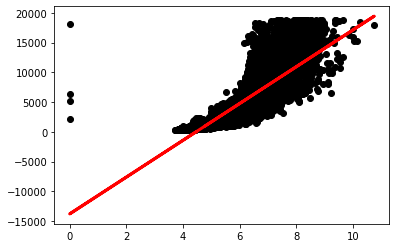

In [14]:
#TODO INTENTO MEJORA 1 (OTRA VARIABLE INDEPENDIENTE)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

X = df[['x size']] #Si modificamos la variable el algoritmo no mejora
y = df[['price']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.80)

regression = linear_model.LinearRegression()
regression_train_x = X_train.values
regression_train_y = y_train.values
regression = regression.fit(regression_train_x.reshape(-1, 1), regression_train_y.reshape(-1, 1))
regression_test_x = X_test.values
regression_test_y = y_test.values


predictions = regression.predict(regression_test_x.reshape(-1, 1))

print(regression.coef_)

print(metrics.mean_squared_error(regression_test_y, predictions))

print(regression.score(X, y))

plt.scatter(regression_test_x, regression_test_y,  color='black')
plt.plot(regression_test_x, predictions, color='red', linewidth=3)
plt.show()

#En el punto 5 para la mejora del algoritmo me he basado en el cambio de variable independiente, el cual he cambiado 'carat' 
#por 'x size', se observa que el algoritmo no mejora.

[[7765.07173716]]
2395289.29709408
0.8493277708330876


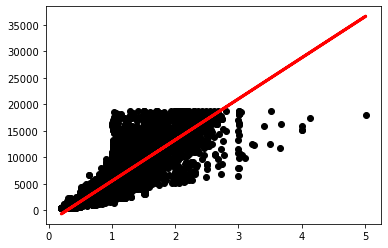

In [15]:
#TODO INTENTO MEJORA 2 (RECOLECTAR MAS DATOS)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

X = df[['carat']] 
y = df[['price']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.95)
#Si modificas el porcentaje de datos para el entrenamiento tampoco mejora el algoritmo

regression = linear_model.LinearRegression()
regression_train_x = X_train.values
regression_train_y = y_train.values
regression = regression.fit(regression_train_x.reshape(-1, 1), regression_train_y.reshape(-1, 1))
regression_test_x = X_test.values
regression_test_y = y_test.values


predictions = regression.predict(regression_test_x.reshape(-1, 1))

print(regression.coef_)

print(metrics.mean_squared_error(regression_test_y, predictions))

print(regression.score(X, y))

plt.scatter(regression_test_x, regression_test_y,  color='black')
plt.plot(regression_test_x, predictions, color='red', linewidth=3)
plt.show()

# Tambien he optado por recolectar mas datos modificando el porcentaje de numero de datos de entrenamiento que se va a usar, 
# en el primer casoutilizamos un 80% y cambiandolo a un 90% se observa que el algoritmo no mejora.
# (Sigue siendo un 85% practicamente)